# Importaciones

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1IaPrdKAenpOluOqsMHi_UOUNPj0riCkI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('titanic_data.csv')

In [ ]:
#Abrir archivo
titanic = pd.read_csv("titanic_data.csv", encoding='latin-1')

# Análisis de Preprocesamiento

In [ ]:
titanic.sample(269)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
543,0,1,male,50.00,1,0,106.42,C,First,man,True,C,Cherbourg,no,False
710,1,1,male,48.00,1,0,52.00,S,First,man,True,C,Southampton,yes,False
238,0,2,male,33.00,0,0,12.28,S,Second,man,True,NaN,Southampton,no,True
713,0,3,male,19.00,0,0,7.65,S,Third,man,True,F,Southampton,no,True
610,1,3,female,NaN,1,0,15.50,Q,Third,woman,False,NaN,Queenstown,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1,3,male,25.00,1,0,7.78,S,Third,man,True,NaN,Southampton,yes,False
35,0,1,male,42.00,1,0,52.00,S,First,man,True,NaN,Southampton,no,False
789,0,2,male,16.00,0,0,26.00,S,Second,man,True,NaN,Southampton,no,True
291,0,2,male,36.00,0,0,12.88,C,Second,man,True,D,Cherbourg,no,True


Mostramos los campos que se encuentran en el Dataframe, junto con la cantidad de valores no nulos que poseen y sus tipos de datos.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


Mostramos estadísticas relacionadas a los datos numéricos.

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.00,889.00,713.00,889.00,889.00,889.00
mean,0.38,2.31,29.70,0.52,0.38,32.26
std,0.49,0.84,14.54,1.10,0.81,49.74
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.92
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


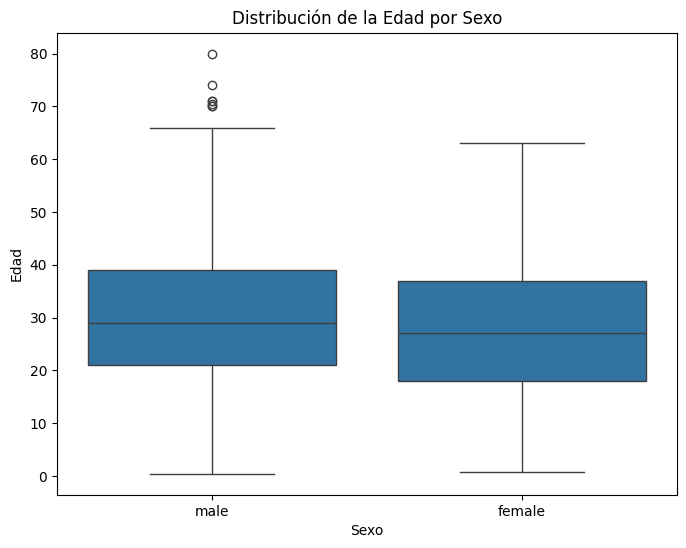

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=titanic)
plt.title('Distribución de la Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

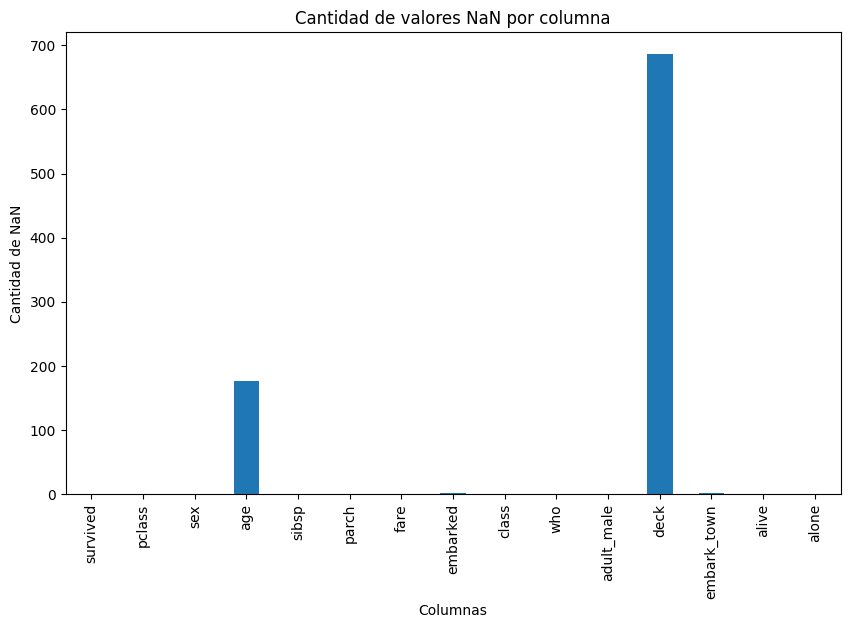

In [ ]:
# Supongamos que tu DataFrame se llama 'titanic'
# Calcula la cantidad de valores NaN por columna
nan_counts = titanic.isna().sum()

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Cantidad de valores NaN por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de NaN')

# Mostrar la gráfica
plt.show()

# Preprocesamiento

## Eliminamos columnas

Comprobamos que los datos de la columna "alive" son los mismos que la columna "survived"

In [ ]:
titanic[(titanic.alive == 'no') & (titanic.survived == 0)].shape[0] + titanic[(titanic.alive == 'yes') & (titanic.survived == 1)].shape[0]

889

Para el resto de las columnas realizamos la misma comprobación.

In [ ]:
titanic = titanic.drop(columns=['alive'])

Los datos de "adult_male" pueden observarse en la columna "who"

*   List item
*   List item



In [ ]:
titanic = titanic.drop(columns=['adult_male'])

Los datos de "embarked" pueden observarse en la columna "embark_town"

*   List item
*   List item



In [ ]:
titanic = titanic.drop(columns=['embarked'])

Los datos de "class" pueden observarse en la columna "pclass"

In [ ]:
titanic = titanic.drop(columns=['class'])

Eliminamos la columna "deck" ya que posee gran cantidad de datos NULOS.

> Add blockquote



In [ ]:
titanic = titanic.drop(columns=['deck'])

Los datos de "alone" pueden deducirse observando las columnas "sibsp" y "parch"

In [ ]:
titanic = titanic.drop(columns=['alone'])

## Analizamos duplicados

In [ ]:
# Contar las apariciones de cada fila
titanic['count_duplicates'] = titanic.groupby(titanic.columns.tolist()).transform('size')

# Eliminar las filas duplicadas manteniendo la primera aparición
titanic = titanic.drop_duplicates(keep='first')

In [ ]:
titanic['count_duplicates'] = titanic['count_duplicates'].fillna(0)

## Imputamos y Eliminamos datos faltantes

Como en "embark_town" son muy pocos los datos que faltan se decidio eliminarlos.

In [ ]:
titanic[titanic["embark_town"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,count_duplicates
61,1,1,female,38.00,0,0,80.00,woman,NaN,0.00
827,1,1,female,62.00,0,0,80.00,woman,NaN,0.00


In [ ]:
titanic = titanic.dropna(subset=['embark_town'])

Para las edades faltantes se decidió imputar el promedio de edad por cada sexo.

In [ ]:
mean_man_age = titanic[(titanic['who'] == 'man') & (titanic['age'].notnull())]["age"].mean()

titanic.loc[(titanic['who'] == 'man') & (titanic['age'].isnull()), 'age'] = mean_man_age

In [ ]:
mean_woman_age = titanic[(titanic['who'] == 'woman') & (titanic['age'].notnull())]["age"].mean()

titanic.loc[(titanic['who'] == 'woman') & (titanic['age'].isnull()), 'age'] = mean_woman_age

## Comprobamos tipo de datos

In [ ]:
titanic['age'] = titanic['age'].astype(int)

In [ ]:
titanic['count_duplicates'] = titanic['count_duplicates'].astype(int)

## Ultimo

Eliminamos la columna "who", ya que sus datos pueden verse con las columnas "sex" y "age"; no la eliminamos antes ya que lo utilizamos primero para imputar las edades faltantes.

In [ ]:
titanic = titanic.drop(columns=['who'])

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,count_duplicates
0,0,3,male,22,1,0,7.25,Southampton,1
1,1,1,female,38,1,0,71.28,Cherbourg,1
2,1,3,female,26,0,0,7.92,Southampton,1
3,1,1,female,35,1,0,53.10,Southampton,1
4,0,3,male,35,0,0,8.05,Southampton,2
...,...,...,...,...,...,...,...,...,...
883,0,3,female,39,0,5,29.12,Queenstown,1
885,1,1,female,19,0,0,30.00,Southampton,1
886,0,3,female,31,1,2,23.45,Southampton,0
887,1,1,male,26,0,0,30.00,Cherbourg,1


# Exportamos a BDD

In [ ]:
import sqlite3

# Conecta a la base de datos SQLite (crea una nueva base de datos si no existe)
conn = sqlite3.connect('titanic_base_de_datos.db')

cursor = conn.cursor()

In [ ]:
# Exporta el DataFrame a una tabla SQLite
titanic.to_sql('pasajeros', conn, if_exists='replace', index=False)

776

In [ ]:
cursor.execute("SELECT * FROM pasajeros ORDER BY RANDOM() LIMIT 258")
cursor.fetchall()

[(0, 1, 'male', 27, 0, 2, 211.5, 'Cherbourg', 1),
 (1, 3, 'female', 35, 1, 1, 20.25, 'Southampton', 1),
 (0, 3, 'female', 16, 5, 2, 46.9, 'Southampton', 1),
 (0, 3, 'male', 33, 0, 0, 7.25, 'Southampton', 0),
 (0, 3, 'female', 40, 1, 0, 9.475, 'Southampton', 1),
 (1, 3, 'female', 5, 4, 2, 31.3875, 'Southampton', 1),
 (0, 3, 'male', 33, 0, 0, 24.15, 'Queenstown', 0),
 (0, 3, 'male', 21, 0, 0, 8.4333, 'Southampton', 1),
 (1, 3, 'female', 5, 2, 1, 19.2583, 'Cherbourg', 1),
 (1, 1, 'male', 4, 0, 2, 81.8583, 'Southampton', 1),
 (1, 2, 'female', 34, 1, 1, 32.5, 'Southampton', 1),
 (0, 3, 'male', 33, 0, 0, 8.6542, 'Southampton', 1),
 (0, 3, 'male', 33, 0, 0, 7.3125, 'Southampton', 0),
 (0, 3, 'male', 24, 0, 0, 7.7958, 'Southampton', 1),
 (1, 2, 'male', 31, 0, 0, 13.0, 'Southampton', 1),
 (1, 1, 'female', 33, 1, 0, 90.0, 'Queenstown', 1),
 (1, 2, 'male', 1, 2, 1, 39.0, 'Southampton', 1),
 (0, 3, 'male', 36, 0, 0, 0.0, 'Southampton', 1),
 (0, 1, 'male', 42, 1, 0, 52.0, 'Southampton', 1),
 (0, 3,

In [ ]:
# Cierra la conexión a la base de datos
conn.close()